In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys


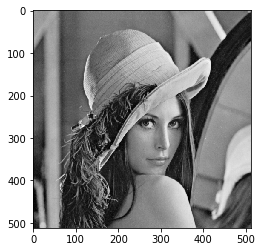

In [4]:
img = cv2.imread("./lena.bmp", 0)
plt.imshow(img, cmap="gray")
plt.show()

In [16]:
#https://en.wikipedia.org/wiki/Roberts_cross
def Roberts(img):
    img = img.astype(np.float64)
    border = 1
    borderImg = cv2.copyMakeBorder(img, border, border, border, border,cv2.BORDER_REPLICATE)
    
    Gx = np.zeros((2,2))
    Gx[0][0] = 1
    Gx[1][1] = -1
    GxImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(2):
                for n in range(2):
                    val += borderImg[i + 1 + m][j + 1 + n] * Gx[m][n]
            GxImg[i][j] = val
    
    
    Gy = np.zeros((2,2))
    Gy[0][1] = 1
    Gy[1][0] = -1
    GyImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(2):
                for n in range(2):
                    val += borderImg[i + 1 + m][j + 1 + n] * Gy[m][n]
            GyImg[i][j] = val
    
    return np.sqrt(np.power(GxImg, 2) + np.power(GyImg, 2))

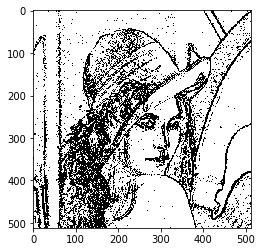

In [39]:
RobertsImg = Roberts(img)
RobertsImg[RobertsImg >= 12] = 255
RobertsImg[RobertsImg < 12] = 0
RobertsImg /= 255.0
RobertsImg = 1 - RobertsImg
plt.imshow(RobertsImg, cmap="gray")
plt.show()

In [21]:
#https://en.wikipedia.org/wiki/Prewitt_operator
def Prewitt(img):
    img = img.astype(np.float64)
    border = 1
    borderImg = cv2.copyMakeBorder(img, border, border, border, border,cv2.BORDER_REPLICATE)
    
    Gx = np.array([
        [1, 0, -1],
        [1, 0, -1], 
        [1, 0, -1]
    ])
    GxImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(3):
                for n in range(3):
                    val += borderImg[i + m][j + n] * Gx[m][n]
            GxImg[i][j] = val
    
    
    Gy = np.array([
        [ 1,  1,  1],
        [ 0,  0,  0], 
        [-1, -1, -1]
    ])
    GyImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(3):
                for n in range(3):
                    val += borderImg[i + m][j + n] * Gy[m][n]
            GyImg[i][j] = val
    
    return np.sqrt(np.power(GxImg, 2) + np.power(GyImg, 2))

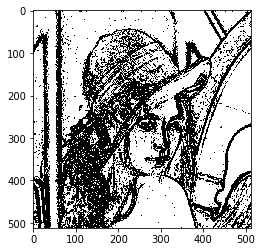

In [22]:
PrewittImg = Prewitt(img)
PrewittImg[PrewittImg >= 24] = 255
PrewittImg[PrewittImg < 24] = 0
PrewittImg /= 255.0
PrewittImg = 1 - PrewittImg
plt.imshow(PrewittImg, cmap="gray")
plt.show()

In [23]:
#https://en.wikipedia.org/wiki/Sobel_operator
def Sobel(img):
    img = img.astype(np.float64)
    border = 1
    borderImg = cv2.copyMakeBorder(img, border, border, border, border,cv2.BORDER_REPLICATE)
    
    Gx = np.array([
        [1, 0, -1],
        [2, 0, -2], 
        [1, 0, -1]
    ])
    GxImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(3):
                for n in range(3):
                    val += borderImg[i + m][j + n] * Gx[m][n]
            GxImg[i][j] = val
    
    
    Gy = np.array([
        [ 1,  2,  1],
        [ 0,  0,  0], 
        [-1, -2, -1]
    ])
    GyImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(3):
                for n in range(3):
                    val += borderImg[i + m][j + n] * Gy[m][n]
            GyImg[i][j] = val
    
    return np.sqrt(np.power(GxImg, 2) + np.power(GyImg, 2))

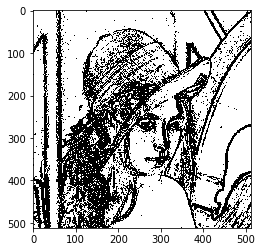

In [24]:
SobelImg = Sobel(img)
SobelImg[SobelImg >= 38] = 255
SobelImg[SobelImg < 38] = 0
SobelImg /= 255.0
SobelImg = 1 - SobelImg
plt.imshow(SobelImg, cmap="gray")
plt.show()

In [27]:
#https://en.wikipedia.org/wiki/Frei%E2%80%93Chen_operator
def FreiAndChen(img):
    img = img.astype(np.float64)
    border = 1
    borderImg = cv2.copyMakeBorder(img, border, border, border, border,cv2.BORDER_REPLICATE)
    
    Gx = np.array([
        [         1, 0,          -1],
        [np.sqrt(2), 0, -np.sqrt(2)], 
        [         1, 0,          -1]
    ])
    GxImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(3):
                for n in range(3):
                    val += borderImg[i + m][j + n] * Gx[m][n]
            GxImg[i][j] = val
    
    
    Gy = np.array([
        [ 1,  np.sqrt(2),  1],
        [ 0,           0,  0], 
        [-1, -np.sqrt(2), -1]
    ])
    GyImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = 0.0
            for m in range(3):
                for n in range(3):
                    val += borderImg[i + m][j + n] * Gy[m][n]
            GyImg[i][j] = val
    
    return np.sqrt(np.power(GxImg, 2) + np.power(GyImg, 2))

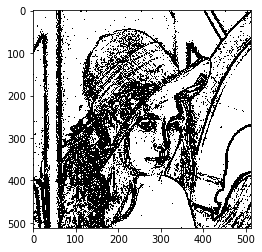

In [28]:
FreiAndChenImg = FreiAndChen(img)
FreiAndChenImg[FreiAndChenImg >= 30] = 255
FreiAndChenImg[FreiAndChenImg < 30] = 0
FreiAndChenImg /= 255.0
FreiAndChenImg = 1 - FreiAndChenImg
plt.imshow(FreiAndChenImg, cmap="gray")
plt.show()

In [30]:
#https://en.wikipedia.org/wiki/Kirsch_operator
def Kirsch(img):
    img = img.astype(np.float64)
    border = 1
    borderImg = cv2.copyMakeBorder(img, border, border, border, border,cv2.BORDER_REPLICATE)
    G = []
    G.append(np.array([
        [ 5,  5,  5],
        [-3,  0, -3], 
        [-3, -3, -3]
    ]))
    G.append(np.array([
        [ 5,  5, -3],
        [ 5,  0, -3], 
        [-3, -3, -3]
    ]))
    G.append(np.array([
        [ 5, -3, -3],
        [ 5,  0, -3], 
        [ 5, -3, -3]
    ]))
    G.append(np.array([
        [-3, -3, -3],
        [ 5,  0, -3], 
        [ 5,  5, -3]
    ]))
    
    G.append(np.array([
        [-3, -3, -3],
        [-3,  0, -3], 
        [ 5,  5,  5]
    ]))
    G.append(np.array([
        [-3, -3, -3],
        [-3,  0,  5], 
        [-3,  5,  5]
    ]))
    G.append(np.array([
        [-3, -3,  5],
        [-3,  0,  5], 
        [-3, -3,  5]
    ]))
    G.append(np.array([
        [-3,  5,  5],
        [-3,  0,  5], 
        [-3, -3, -3]
    ]))
    G = np.array(G)
    resultImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for z in range(8):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                val = 0.0
                for m in range(3):
                    for n in range(3):
                        val += borderImg[i + m][j + n] * G[z][m][n]
                resultImg[i][j] = max(val, resultImg[i][j])
    
    return resultImg

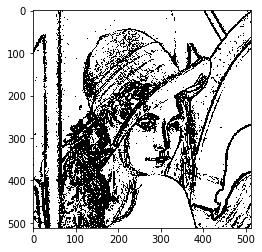

In [31]:
KirschImg = Kirsch(img)
KirschImg[KirschImg >= 135] = 255
KirschImg[KirschImg < 135] = 0
KirschImg /= 255.0
KirschImg = 1 - KirschImg
plt.imshow(KirschImg, cmap="gray")
plt.show()

In [33]:
#https://en.wikipedia.org/wiki/Robinson_compass_mask
def Robinson(img):
    img = img.astype(np.float64)
    border = 1
    borderImg = cv2.copyMakeBorder(img, border, border, border, border,cv2.BORDER_REPLICATE)
    G = []
    G.append(np.array([
        [-1,  0,  1],
        [-2,  0,  2], 
        [-1,  0,  1]
    ]))
    G.append(np.array([
        [ 0,  1,  2],
        [-1,  0,  1], 
        [-2, -1,  0]
    ]))
    G.append(np.array([
        [ 1,  2,  1],
        [ 0,  0,  0], 
        [-1, -2, -1]
    ]))
    G.append(np.array([
        [ 2,  1,  0],
        [ 1,  0, -1], 
        [ 0, -1, -2]
    ]))
    
    G.append(np.array([
        [ 1,  0, -1],
        [ 2,  0, -2], 
        [ 1,  0, -1]
    ]))
    G.append(np.array([
        [ 0, -1, -2],
        [ 1,  0, -1], 
        [ 2,  1,  0]
    ]))
    G.append(np.array([
        [-1, -2, -1],
        [ 0,  0,  0], 
        [ 1,  2,  1]
    ]))
    G.append(np.array([
        [-2, -1,  0],
        [-1,  0,  1], 
        [ 0,  1,  2]
    ]))
    G = np.array(G)
    resultImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for z in range(8):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                val = 0.0
                for m in range(3):
                    for n in range(3):
                        val += borderImg[i + m][j + n] * G[z][m][n]
                resultImg[i][j] = max(val, resultImg[i][j])
    
    return resultImg

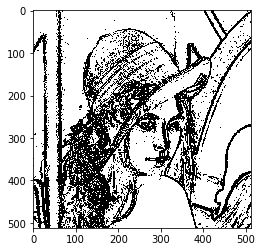

In [34]:
RobinsonImg = Robinson(img)
RobinsonImg[RobinsonImg >= 43] = 255
RobinsonImg[RobinsonImg < 43] = 0
RobinsonImg /= 255.0
RobinsonImg = 1 - RobinsonImg
plt.imshow(RobinsonImg, cmap="gray")
plt.show()

In [37]:
#https://en.wikipedia.org/wiki/Robinson_compass_mask
def Nevatia_Babu(img):
    img = img.astype(np.float64)
    border = 2
    borderImg = cv2.copyMakeBorder(img, border, border, border, border,cv2.BORDER_REPLICATE)
    G = []
    G.append(np.array([
        [ 100, 100, 100, 100, 100],
        [ 100, 100, 100, 100, 100],
        [   0,   0,   0,   0,   0],
        [-100,-100,-100,-100,-100],
        [-100,-100,-100,-100,-100]
    ]))
    G.append(np.array([
        [ 100, 100, 100, 100, 100],
        [ 100, 100, 100,  78, -32],
        [ 100,  92,   0, -92,-100],
        [  32, -78,-100,-100,-100],
        [-100,-100,-100,-100,-100]
    ]))
    G.append(np.array([
        [ 100, 100, 100,  32,-100],
        [ 100, 100, 100, -78,-100],
        [ 100, 100,   0,-100,-100],
        [ 100,  78, -92,-100,-100],
        [ 100, -32,-100,-100,-100]
    ]))
    
    G.append(np.array([
        [-100,-100,   0, 100, 100],
        [-100,-100,   0, 100, 100],
        [-100,-100,   0, 100, 100],
        [-100,-100,   0, 100, 100],
        [-100,-100,   0, 100, 100]
    ]))
    G.append(np.array([
        [-100,  32, 100, 100, 100],
        [-100, -78,  92, 100, 100],
        [-100,-100,   0, 100, 100],
        [-100,-100, -92,  78, 100],
        [-100,-100,-100, -32, 100]
    ]))
    G.append(np.array([
        [ 100, 100, 100, 100, 100],
        [ -32,  78, 100, 100, 100],
        [-100, -92,   0,  92, 100],
        [-100,-100,-100, -78,  32],
        [-100,-100,-100,-100,-100]
    ]))
    G = np.array(G)
    resultImg = np.zeros(img.shape)
    #print(GxImg.shape)
    for z in range(6):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                val = 0.0
                for m in range(5):
                    for n in range(5):
                        val += borderImg[i + m][j + n] * G[z][m][n]
                resultImg[i][j] = max(val, resultImg[i][j])
    
    return resultImg

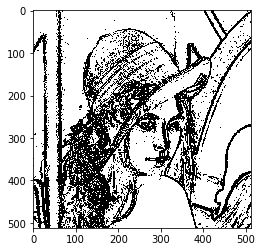

In [38]:
Nevatia_BabuImg = Nevatia_Babu(img)
Nevatia_BabuImg[Nevatia_BabuImg >= 12500] = 255
Nevatia_BabuImg[Nevatia_BabuImg < 12500] = 0
Nevatia_BabuImg /= 255.0
Nevatia_BabuImg = 1 - Nevatia_BabuImg
plt.imshow(RobinsonImg, cmap="gray")
plt.show()